In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

2024-09-05 15:33:04.339130: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-05 15:33:04.367777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-05 15:33:04.822402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
local_zip = './Vehicles.zip'
ziploc ='./tmp'
if not os.path.exists(ziploc):
    os.makedirs(ziploc)
with zipfile.ZipFile(local_zip,'r') as zip_ref:
    zip_ref.extractall(ziploc)

In [2]:
base_dir = './tmp/Vehicles/'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator_model1 = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    color_mode = 'rgb',
    class_mode = 'sparse',
    subset = 'training',
    batch_size = 32
)
validation_generator_model1 = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    color_mode = 'rgb',
    class_mode = 'sparse',
    subset = 'validation',
    batch_size = 32
)
test_generator_model1 = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64,64),
    color_mode = 'rgb',
    class_mode = 'sparse',
    batch_size = 32
)
train_generator_model2 = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    subset = 'training',
    batch_size = 32
)
validation_generator_model2 = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    subset = 'validation',
    batch_size = 32
)
test_generator_model2 = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    batch_size = 32
)

Found 1680 images belonging to 7 classes.
Found 420 images belonging to 7 classes.
Found 700 images belonging to 7 classes.
Found 1680 images belonging to 7 classes.
Found 420 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


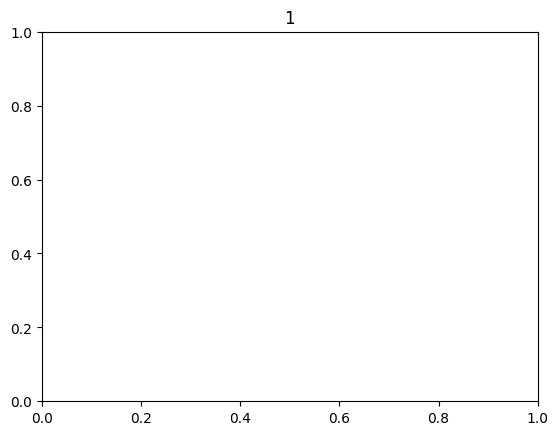

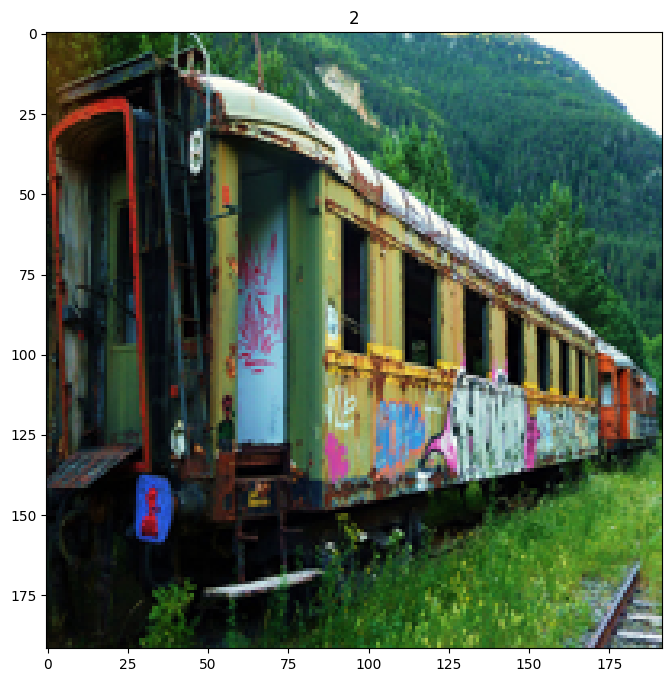

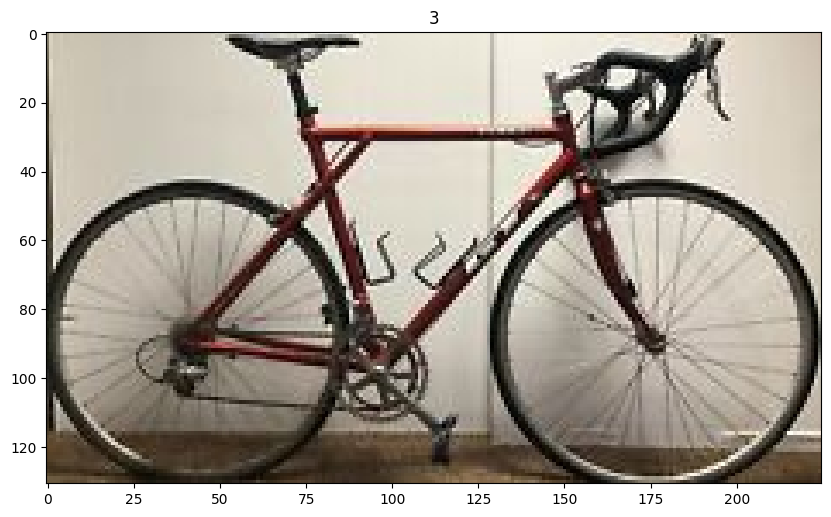

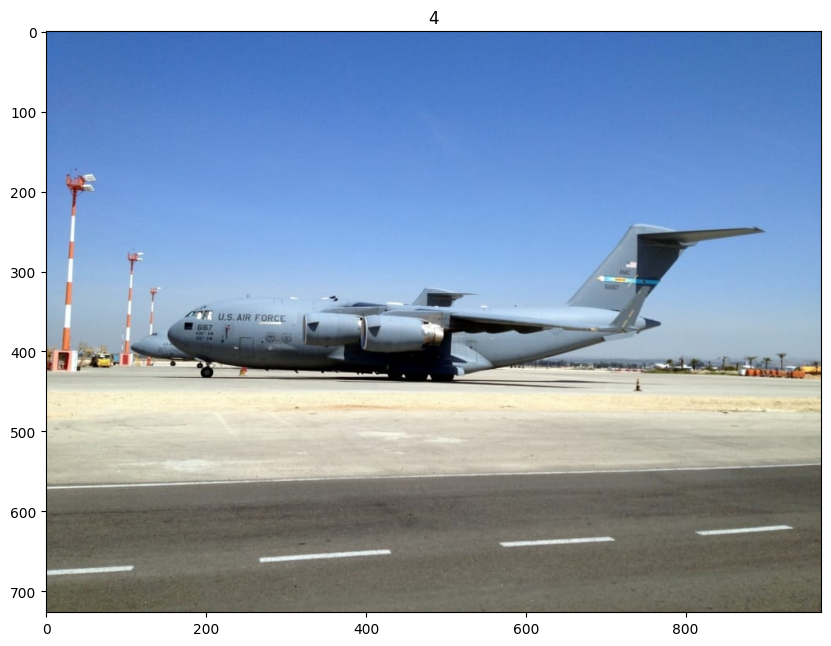

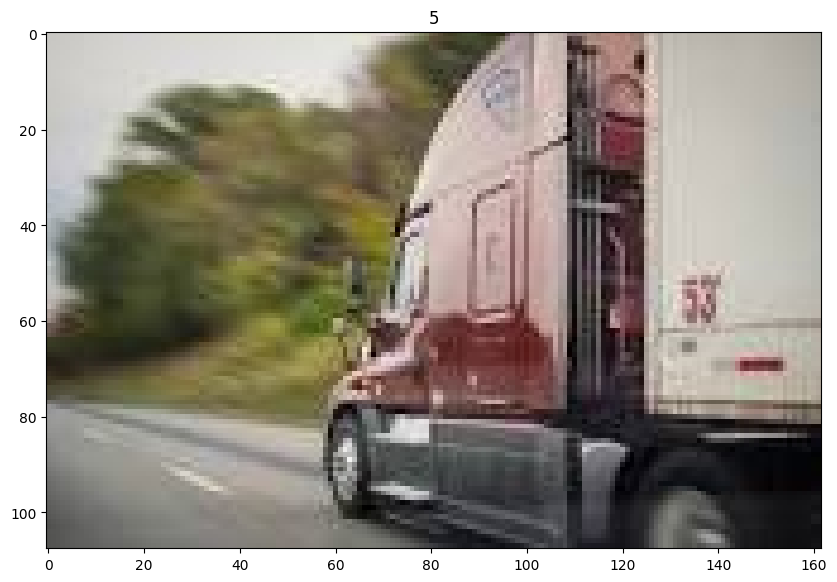

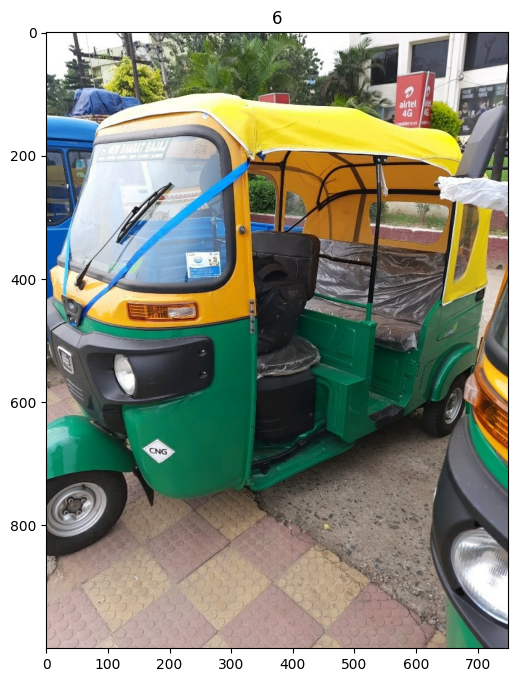

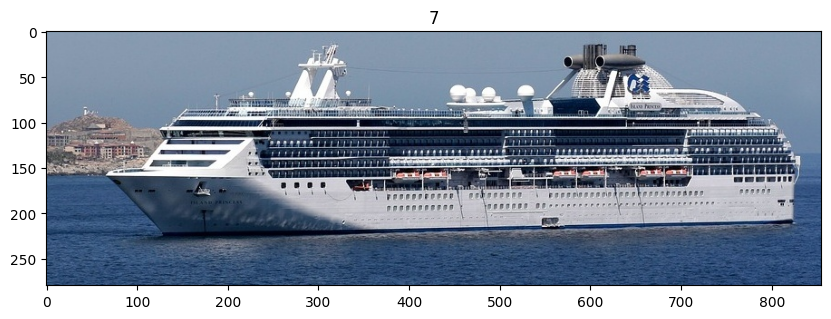

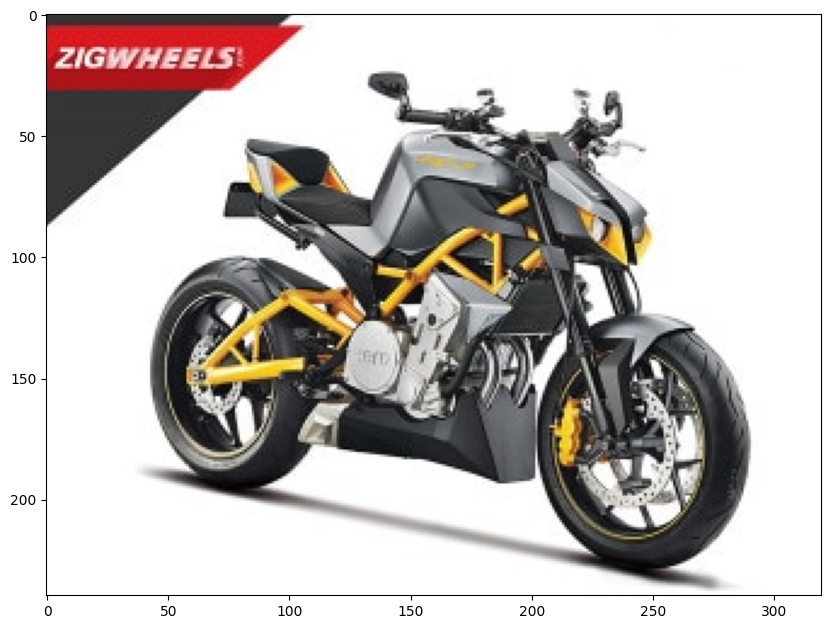

In [4]:
i=1
for classes in os.listdir(train_dir):
    img = os.listdir(os.path.join(train_dir,classes))[0]
    plt.title(i)
    i+=1
    plt.figure(figsize = (10,8))
    plt.imshow(mpimg.imread(os.path.join(train_dir,classes,img)))

In [5]:
os.listdir(train_dir)

['Trains', 'Bikes', 'Planes', 'Cars', 'Auto Rickshaws', 'Ships', 'Motorcycles']

In [6]:
model1 = Sequential([
    Conv2D(32,strides=(1,1),kernel_size = (3,3),padding='valid',input_shape = (64,64,3),activation = 'relu'),
    MaxPool2D(strides = (2,2),padding = 'valid'),
    Conv2D(64,strides=(1,1),kernel_size = (3,3),padding='valid',activation = 'relu'),
    MaxPool2D(strides = (2,2),padding = 'valid'),
    Conv2D(128,strides=(1,1),kernel_size = (3,3),padding='valid',activation = 'relu'),
    MaxPool2D(strides = (2,2),padding = 'valid'),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(64,activation = 'relu'),
    Dense(8,activation = 'softmax')
])

2024-09-05 15:33:23.188059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-05 15:33:23.204593: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-05 15:33:23.204749: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [8]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights = './vgg16_weights.h5',include_top = False,input_shape = (224,224,3))

In [ ]:
'''
from tensorflow.keras.models import Model
x = base_model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
    '''

In [9]:
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(8,activation = 'softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               12845568  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 27693640 (105.64 MB)
Trainable params: 27693640 (105.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


model name is normal cnn
Epoch 1/30


2024-09-05 15:33:33.431663: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-09-05 15:33:33.878961: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f090afc0350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-05 15:33:33.878984: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-09-05 15:33:33.881978: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-05 15:33:33.957827: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/53 [==============================] - 11s 163ms/step - loss: 1.9799 - accuracy: 0.1774 - val_loss: 1.8885 - val_accuracy: 0.2738
Epoch 2/30
53/53 [==============================] - 9s 162ms/step - loss: 1.7638 - accuracy: 0.3637 - val_loss: 1.6122 - val_accuracy: 0.5071
Epoch 3/30
53/53 [==============================] - 8s 161ms/step - loss: 1.5063 - accuracy: 0.4810 - val_loss: 1.3968 - val_accuracy: 0.5190
Epoch 4/30
53/53 [==============================] - 8s 162ms/step - loss: 1.3199 - accuracy: 0.5440 - val_loss: 1.3164 - val_accuracy: 0.5500
Epoch 5/30
53/53 [==============================] - 8s 161ms/step - loss: 1.2063 - accuracy: 0.5827 - val_loss: 1.1879 - val_accuracy: 0.5786
Epoch 6/30
53/53 [==============================] - 8s 157ms/step - loss: 1.1097 - accuracy: 0.6167 - val_loss: 1.1901 - val_accuracy: 0.5881
Epoch 7/30
53/53 [==============================] - 8s 161ms/step - loss: 1.0297 - accuracy: 0.6536 - val_loss: 1.1339 - val_accuracy: 0.5857
Epoch 8/30
53/53

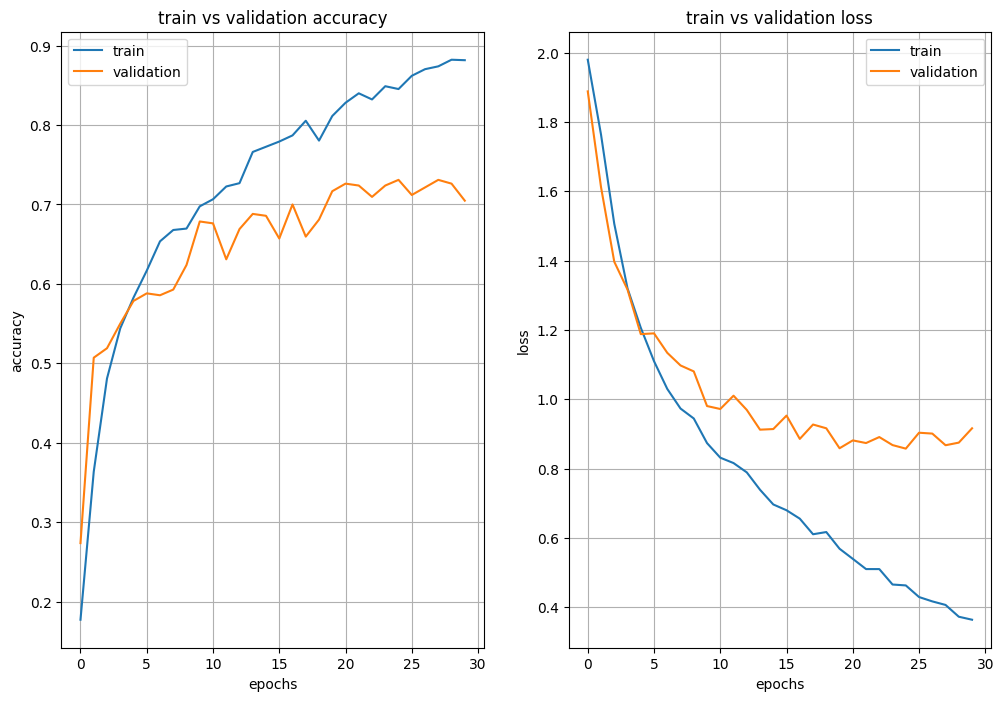

In [10]:
results = []
from tensorflow.keras.optimizers import Adam
print(f'model name is normal cnn')
model1.compile(optimizer=Adam(learning_rate=0.0001),loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model1.fit(train_generator_model1,epochs = 30,batch_size=32,validation_data = validation_generator_model1)
accuracy = np.mean(history.history['accuracy']).mean()
val_accuracy=np.mean(history.history['val_accuracy']).mean()
loss = np.mean(history.history['loss']).mean()
val_loss = np.mean(history.history['val_loss']).mean()
results.append(['normal_cnn',accuracy,val_accuracy,loss,val_loss])
#plotting
plt.figure(figsize =(12,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('train vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.grid(True)

### The Curve shows that there is overfitting going on and we can observe that by seeing that validation accuracy remains to be the same butthe train accuracy is increasing only leading to overfitting case

In [11]:
test_loss,test_accuracy = model1.evaluate(test_generator_model1,batch_size =32)
print(f'test loss is {test_loss} and test accuracy is {test_accuracy}')
y_pred_prob = model1.predict(test_generator_model1)
y_pred = np.argmax(y_pred_prob,axis =1)
print(confusion_matrix(test_generator_model1.classes,y_pred))
print(classification_report(test_generator_model1.classes,y_pred))

22/22 [==============================] - 2s 104ms/step - loss: 0.7585 - accuracy: 0.7471
test loss is 0.7584618926048279 and test accuracy is 0.7471428513526917
22/22 [==============================] - 2s 99ms/step
[[18 12 21 14 12  7 16]
 [11 16 13 15 15 12 18]
 [12 14 15 23 12  9 15]
 [ 9 12 18 13 19 12 17]
 [14 12 16 14 14  6 24]
 [ 7 19 22 15 15  5 17]
 [10 20 16 16 20  8 10]]
              precision    recall  f1-score   support

           0       0.22      0.18      0.20       100
           1       0.15      0.16      0.16       100
           2       0.12      0.15      0.14       100
           3       0.12      0.13      0.12       100
           4       0.13      0.14      0.14       100
           5       0.08      0.05      0.06       100
           6       0.09      0.10      0.09       100

    accuracy                           0.13       700
   macro avg       0.13      0.13      0.13       700
weighted avg       0.13      0.13      0.13       700



### most misclassified one was of class 5 for this model

model name is normal cnn
Epoch 1/30
53/53 [==============================] - 10s 158ms/step - loss: 2.0078 - accuracy: 0.1482 - val_loss: 1.9315 - val_accuracy: 0.1476
Epoch 2/30
53/53 [==============================] - 8s 160ms/step - loss: 1.8148 - accuracy: 0.3000 - val_loss: 1.7042 - val_accuracy: 0.3310
Epoch 3/30
53/53 [==============================] - 8s 158ms/step - loss: 1.5373 - accuracy: 0.4583 - val_loss: 1.4532 - val_accuracy: 0.4881
Epoch 4/30
53/53 [==============================] - 8s 161ms/step - loss: 1.3087 - accuracy: 0.5440 - val_loss: 1.3161 - val_accuracy: 0.5381
Epoch 5/30
53/53 [==============================] - 8s 160ms/step - loss: 1.1562 - accuracy: 0.6101 - val_loss: 1.1775 - val_accuracy: 0.5929
Epoch 6/30
53/53 [==============================] - 8s 154ms/step - loss: 1.0666 - accuracy: 0.6363 - val_loss: 1.1503 - val_accuracy: 0.6071
Epoch 7/30
53/53 [==============================] - 9s 162ms/step - loss: 0.9982 - accuracy: 0.6423 - val_loss: 1.0446 - v

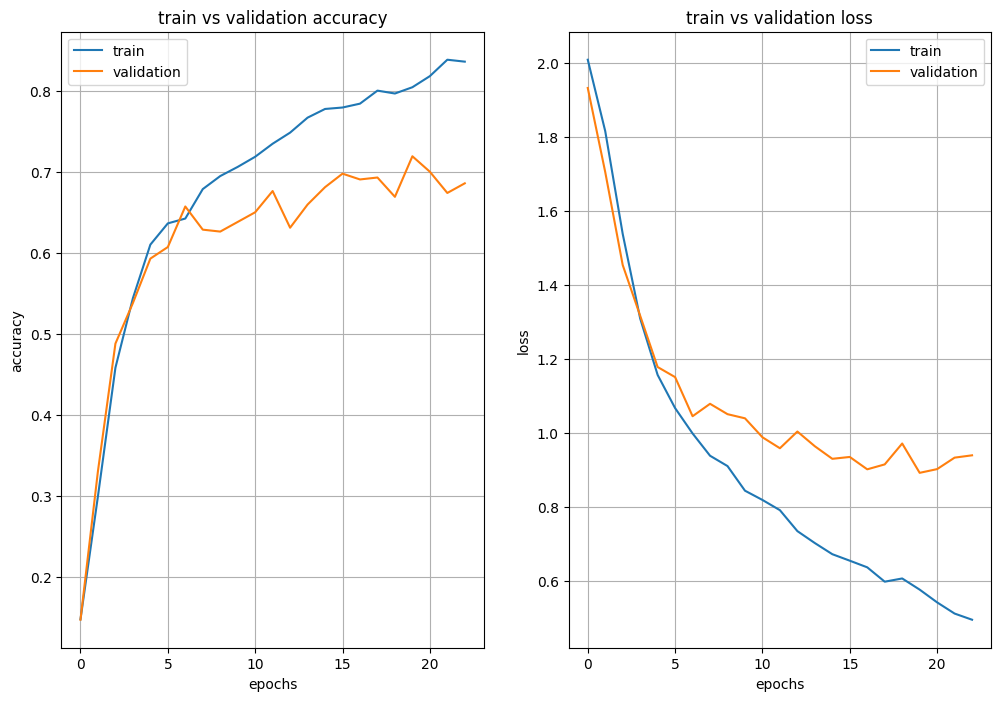

In [12]:
# To get better we can do is use early stopping to prevent the overfitting
from tensorflow.keras.callbacks import EarlyStopping
model1 = Sequential([
    Conv2D(32,strides=(1,1),kernel_size = (3,3),padding='valid',input_shape = (64,64,3),activation = 'relu'),
    MaxPool2D(strides = (2,2),padding = 'valid'),
    Conv2D(64,strides=(1,1),kernel_size = (3,3),padding='valid',activation = 'relu'),
    MaxPool2D(strides = (2,2),padding = 'valid'),
    Conv2D(128,strides=(1,1),kernel_size = (3,3),padding='valid',activation = 'relu'),
    MaxPool2D(strides = (2,2),padding = 'valid'),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(64,activation = 'relu'),
    Dense(8,activation = 'softmax')
])
print(f'model name is normal cnn')
model1.compile(optimizer=Adam(learning_rate=0.0001),loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
earlystopping = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)
history = model1.fit(train_generator_model1,epochs = 30,batch_size=32,validation_data = validation_generator_model1,callbacks=[earlystopping])
accuracy = np.mean(history.history['accuracy']).mean()
val_accuracy=np.mean(history.history['val_accuracy']).mean()
loss = np.mean(history.history['loss']).mean()
val_loss = np.mean(history.history['val_loss']).mean()
results.append(['improved_normal_cnn',accuracy,val_accuracy,loss,val_loss])
#plotting
plt.figure(figsize =(12,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('train vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.grid(True)

model name is vgg16
Epoch 1/30


2024-09-05 15:42:19.237345: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-05 15:42:19.237382: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-05 15:42:19.341111: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-05 15:42:20.200438: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU

53/53 [==============================] - 44s 586ms/step - loss: 0.6547 - accuracy: 0.7780 - val_loss: 0.3224 - val_accuracy: 0.8857
Epoch 2/30
53/53 [==============================] - 24s 446ms/step - loss: 0.1569 - accuracy: 0.9476 - val_loss: 0.3039 - val_accuracy: 0.9143
Epoch 3/30
53/53 [==============================] - 24s 447ms/step - loss: 0.0632 - accuracy: 0.9845 - val_loss: 0.2574 - val_accuracy: 0.9143
Epoch 4/30
53/53 [==============================] - 24s 448ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.2762 - val_accuracy: 0.9238
Epoch 5/30
53/53 [==============================] - 24s 449ms/step - loss: 0.0635 - accuracy: 0.9774 - val_loss: 0.3430 - val_accuracy: 0.9190
Epoch 6/30
53/53 [==============================] - 24s 446ms/step - loss: 0.0502 - accuracy: 0.9857 - val_loss: 0.3428 - val_accuracy: 0.9190
Epoch 7/30
53/53 [==============================] - 24s 448ms/step - loss: 0.0396 - accuracy: 0.9833 - val_loss: 0.2032 - val_accuracy: 0.9405
Epoch 8/30

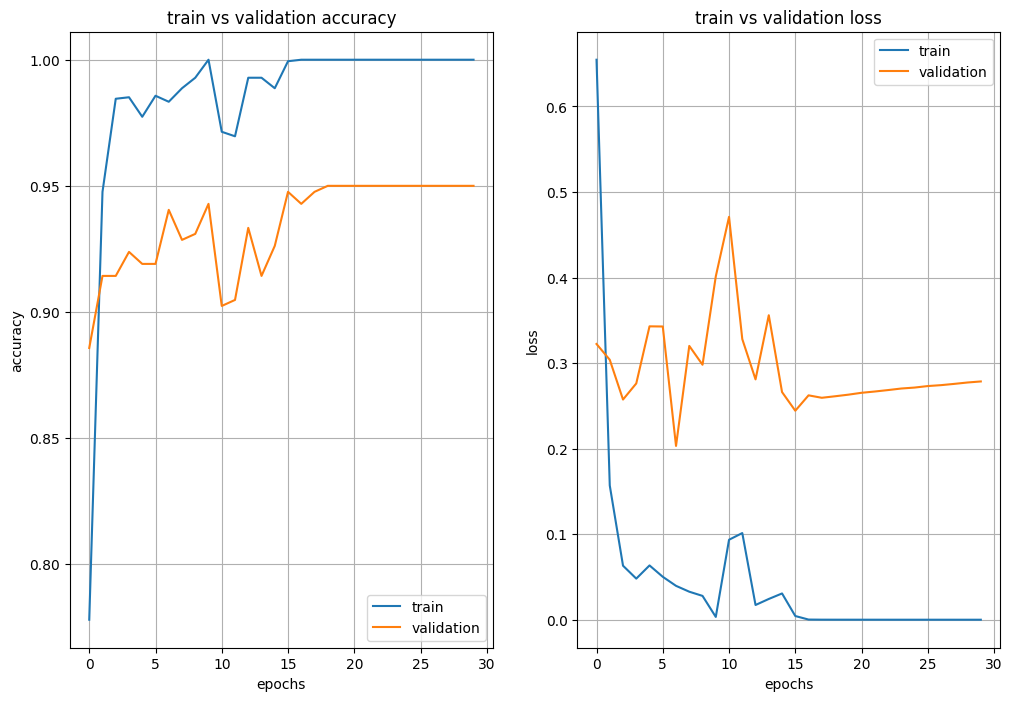

In [13]:
print(f'model name is vgg16')
model2.compile(optimizer=Adam(learning_rate=0.0001),loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model2.fit(train_generator_model2,epochs = 30,batch_size=32,validation_data = validation_generator_model2)
accuracy = np.mean(history.history['accuracy']).mean()
val_accuracy=np.mean(history.history['val_accuracy']).mean()
loss = np.mean(history.history['loss']).mean()
val_loss = np.mean(history.history['val_loss']).mean()
results.append(['vgg16',accuracy,val_accuracy,loss,val_loss])
#plotting
plt.figure(figsize =(12,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('train vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.grid(True)

### The Curve shows that there is overfitting going on and we can observe that by seeing that validation accuracy remains to be the same but the train accuracy is increasing only leading to overfitting case

In [14]:
test_loss,test_accuracy = model2.evaluate(test_generator_model2,batch_size =32)
print(f'test loss is {test_loss} and test accuracy is {test_accuracy}')
y_pred_prob = model2.predict(test_generator_model2)
y_pred = np.argmax(y_pred_prob,axis =1)
print(confusion_matrix(test_generator_model2.classes,y_pred))
print(classification_report(test_generator_model2.classes,y_pred))

22/22 [==============================] - 6s 287ms/step - loss: 0.1330 - accuracy: 0.9700
test loss is 0.13300840556621552 and test accuracy is 0.9700000286102295
22/22 [==============================] - 3s 131ms/step
[[15 13 15 14 24 10  9]
 [16 14 21 12 12 11 14]
 [15 17  7 15 15 20 11]
 [14 11 11 16 12 16 20]
 [10 16 17 16  7 16 18]
 [14 18 13 14 13 17 11]
 [17 12 16 14 14 10 17]]
              precision    recall  f1-score   support

           0       0.15      0.15      0.15       100
           1       0.14      0.14      0.14       100
           2       0.07      0.07      0.07       100
           3       0.16      0.16      0.16       100
           4       0.07      0.07      0.07       100
           5       0.17      0.17      0.17       100
           6       0.17      0.17      0.17       100

    accuracy                           0.13       700
   macro avg       0.13      0.13      0.13       700
weighted avg       0.13      0.13      0.13       700



model name is vgg16
Epoch 1/30
53/53 [==============================] - 29s 496ms/step - loss: 0.2492 - accuracy: 0.9220 - val_loss: 0.3666 - val_accuracy: 0.9167
Epoch 2/30
53/53 [==============================] - 26s 488ms/step - loss: 0.0556 - accuracy: 0.9810 - val_loss: 0.4602 - val_accuracy: 0.8833
Epoch 3/30
53/53 [==============================] - 26s 487ms/step - loss: 0.0850 - accuracy: 0.9738 - val_loss: 0.2830 - val_accuracy: 0.9310
Epoch 4/30
53/53 [==============================] - 26s 489ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.1535 - val_accuracy: 0.9595
Epoch 5/30
53/53 [==============================] - 26s 486ms/step - loss: 0.0131 - accuracy: 0.9946 - val_loss: 0.2500 - val_accuracy: 0.9500
Epoch 6/30
53/53 [==============================] - 26s 486ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.3304 - val_accuracy: 0.9286
Epoch 7/30
53/53 [==============================] - 26s 488ms/step - loss: 0.0808 - accuracy: 0.9744 - val_loss: 0.5085 - 

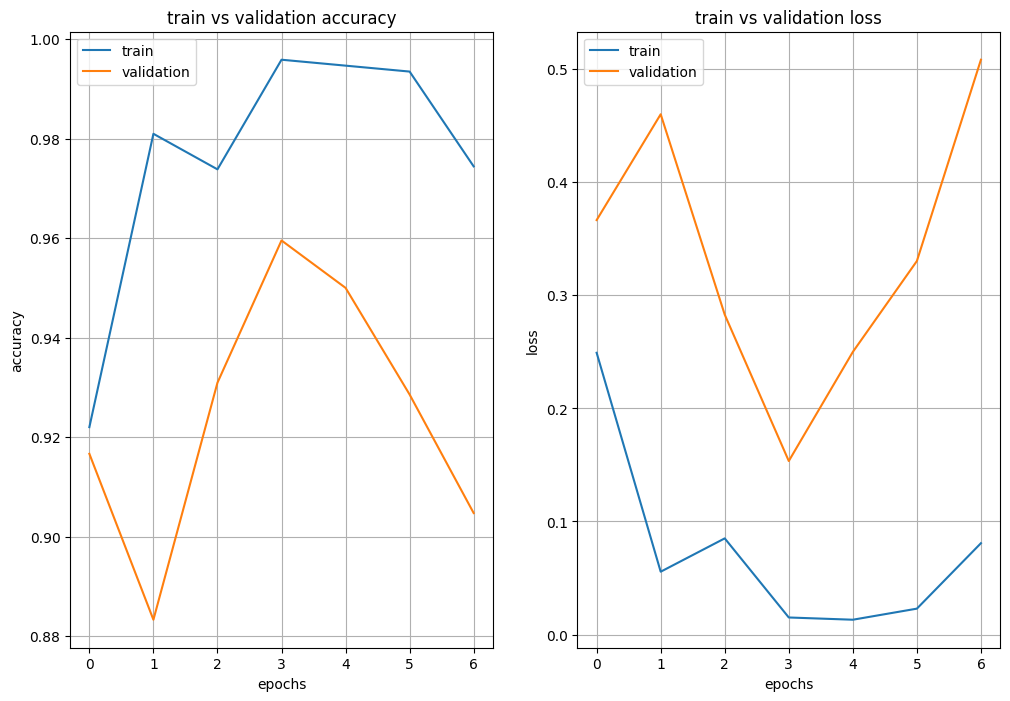

In [15]:
print(f'model name is vgg16')
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(8,activation = 'softmax')
])
model2.compile(optimizer=Adam(learning_rate=0.0001),loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
earlystopping = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)
history = model2.fit(train_generator_model2,epochs = 30,batch_size=32,validation_data = validation_generator_model2,callbacks = [earlystopping])
accuracy = np.mean(history.history['accuracy']).mean()
val_accuracy=np.mean(history.history['val_accuracy']).mean()
loss = np.mean(history.history['loss']).mean()
val_loss = np.mean(history.history['val_loss']).mean()
results.append(['improved_vgg16',accuracy,val_accuracy,loss,val_loss])
#plotting
plt.figure(figsize =(12,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('train vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.grid(True)

In [17]:
test_loss,test_accuracy = model2.evaluate(test_generator_model2,batch_size =32)
print(f'test loss is {test_loss} and test accuracy is {test_accuracy}')
y_pred_prob = model2.predict(test_generator_model2)
y_pred = np.argmax(y_pred_prob,axis =1)
print(confusion_matrix(test_generator_model2.classes,y_pred))
print(classification_report(test_generator_model2.classes,y_pred))

22/22 [==============================] - 3s 135ms/step - loss: 0.1328 - accuracy: 0.9629
test loss is 0.13275258243083954 and test accuracy is 0.9628571271896362
22/22 [==============================] - 3s 131ms/step
[[14 16  9 17 16  8 20]
 [10 12 17 22 16 13 10]
 [17 19 14  8 14 13 15]
 [16  7 14 12 19 13 19]
 [20 11 21 15  9 12 12]
 [16 19 12 12 14 17 10]
 [12 15 12 14 16 17 14]]
              precision    recall  f1-score   support

           0       0.13      0.14      0.14       100
           1       0.12      0.12      0.12       100
           2       0.14      0.14      0.14       100
           3       0.12      0.12      0.12       100
           4       0.09      0.09      0.09       100
           5       0.18      0.17      0.18       100
           6       0.14      0.14      0.14       100

    accuracy                           0.13       700
   macro avg       0.13      0.13      0.13       700
weighted avg       0.13      0.13      0.13       700



### the class with the number 4 is being misclassified the most

In [16]:
results_df = pd.DataFrame(results,columns = [
    'model name',
    'train accuracy',
    'validation accuracy',
    'train loss',
    'validation loss'
])
results_df

,model name,train accuracy,validation accuracy,train loss,validation loss
0,normal_cnn,0.722520,0.649048,0.806033,1.034436
1,improved_normal_cnn,0.679089,0.612215,0.909446,1.094513
2,vgg16,0.984603,0.934603,0.047063,0.292744
3,improved_vgg16,0.976446,0.924830,0.074526,0.336014


### Seeing all the models vgg16 with earlystopping seems to have better performance